# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning - Prof. Tatiana Escovedo
## Pré-processamento de Dados - Exemplos

## Prática 1: Transformações Numéricas com dataset Diabetes

Para este experimento, vamos utilizar o dataset **Pima Indians Diabetes**, que  é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Seu objetivo dé prever se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico médico. Este é um subconjunto de um dataset maior e aqui, todos os pacientes são mulheres com pelo menos 21 anos de idade e de herança indígena Pima.

Os conjuntos de dados consistem em vários atributos ​​de exames médicos e uma variável de classe. As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.
Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Informações sobre os atributos:**
1. **preg** - Number of times pregnant 
2. **plas** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. **pres** - Diastolic blood pressure (mm Hg) 
4. **skin** - Triceps skin fold thickness (mm) 
5. **test** - 2-Hour serum insulin (mu U/ml) 
6. **mass** - Body mass index (weight in kg/(height in m)^2) 
7. **pedi** - Diabetes pedigree function 
8. **age** - Age (years) 
9. **class** - Class variable (0 or 1) 

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import Normalizer # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

### Carga do Dataset

In [2]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Informa o cabeçalho das colunas
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

# exibindo as primeiras linhas
dataset.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Tratamento de Missings

In [3]:
# verificando nulls no dataset
dataset.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Já sabemos que este dataset não tem missings aparentes (o comando isnull() não indica nenhum valor missing inicialmente), mas temos alguns valores = zero, em colunas que zero é um dado inválido.

Vamos então marcar os valores zero como missings para que possamos decidir o que fazer com eles (exemplos: eliminar linhas, eliminar colunas, fazer a imputação dos valores fantantes...).

**É sempre uma boa prática salvar uma cópia do dataset original antes de fazer qualquer tipo de manipulação.**

<AxesSubplot:>

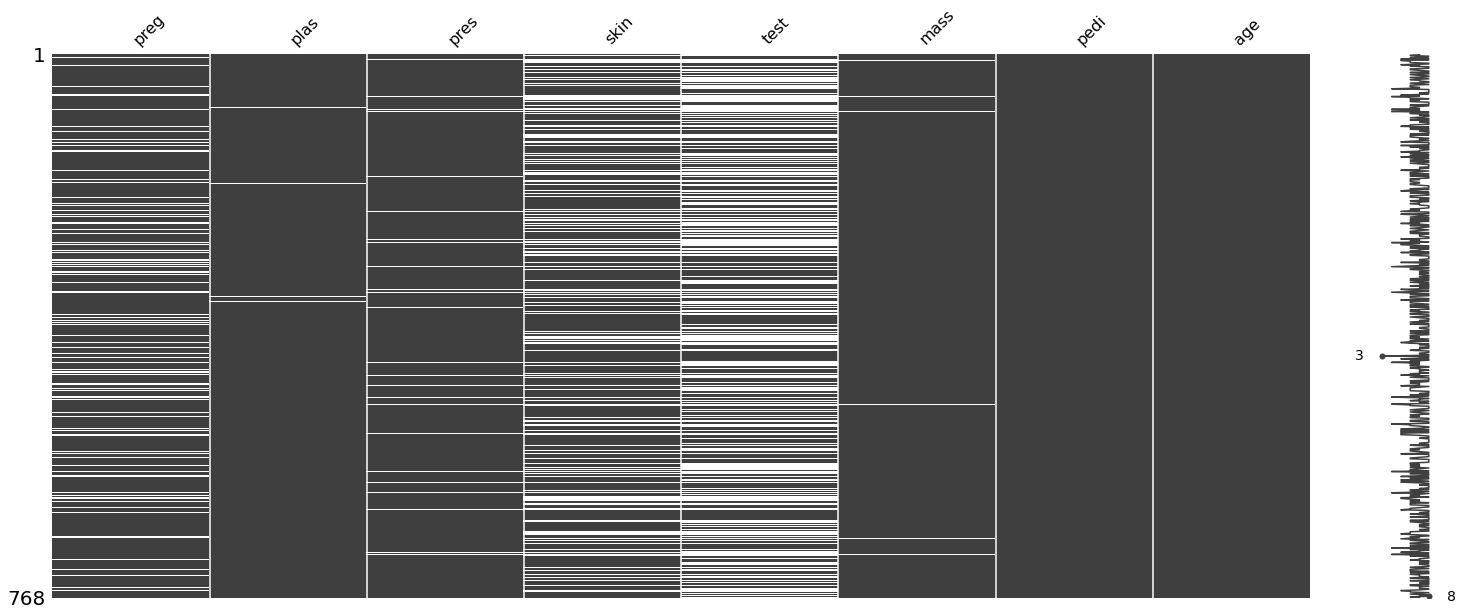

In [4]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [5]:
# verificando novamente nulls no dataset
atributos.isnull().sum()

preg    111
plas      5
pres     35
skin    227
test    374
mass     11
pedi      0
age       0
dtype: int64

Vamos remover os atributos *skin* e *test*, pois há muitos valores faltantes em relação ao total de registros. OBS: esta é apenas uma das opções possíveis!

<AxesSubplot:>

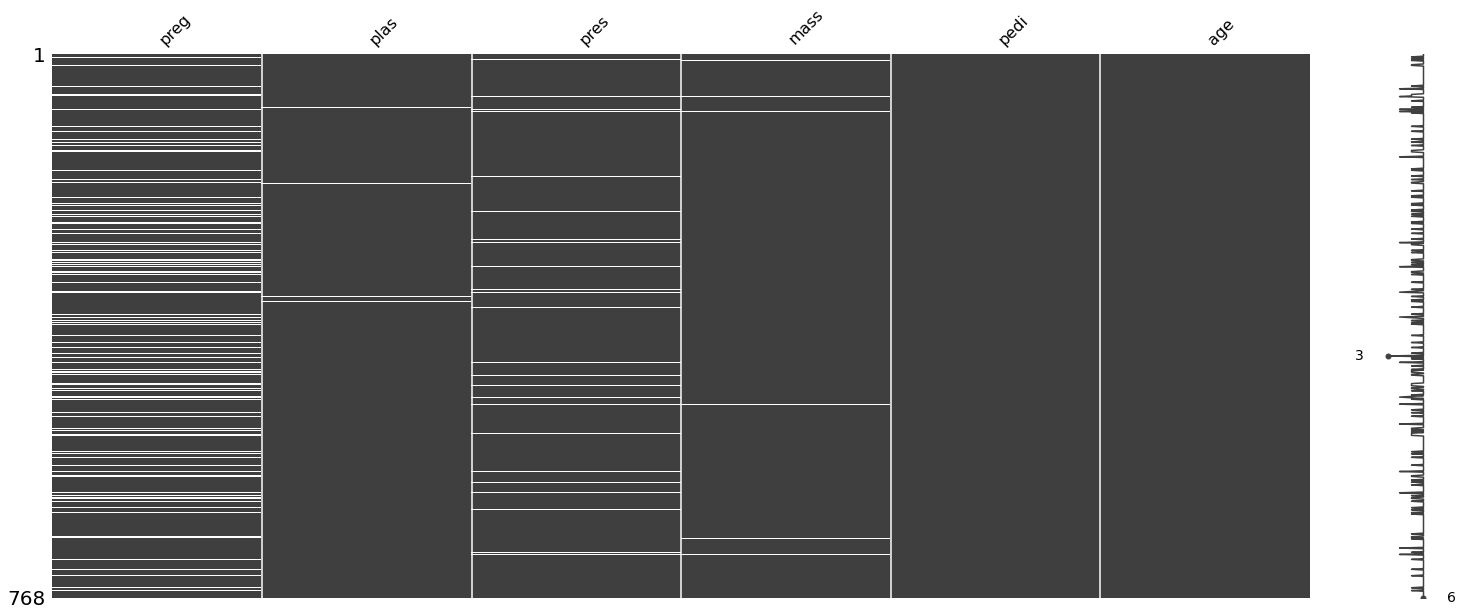

In [6]:
# removendo as colunas 'skin' e 'test'
atributos.drop(['skin', 'test'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Vamos agora tratar as demais colunas com missings. Vamos substituir os Na's de *preg* por **zero**, pois é possível que haja mulheres no dataset que nunca tenham ficado grávidas. Para os demais atributos, vamos substituir pela **mediana** da coluna. OBS: esta é apenas uma das opções possíveis!

<AxesSubplot:>

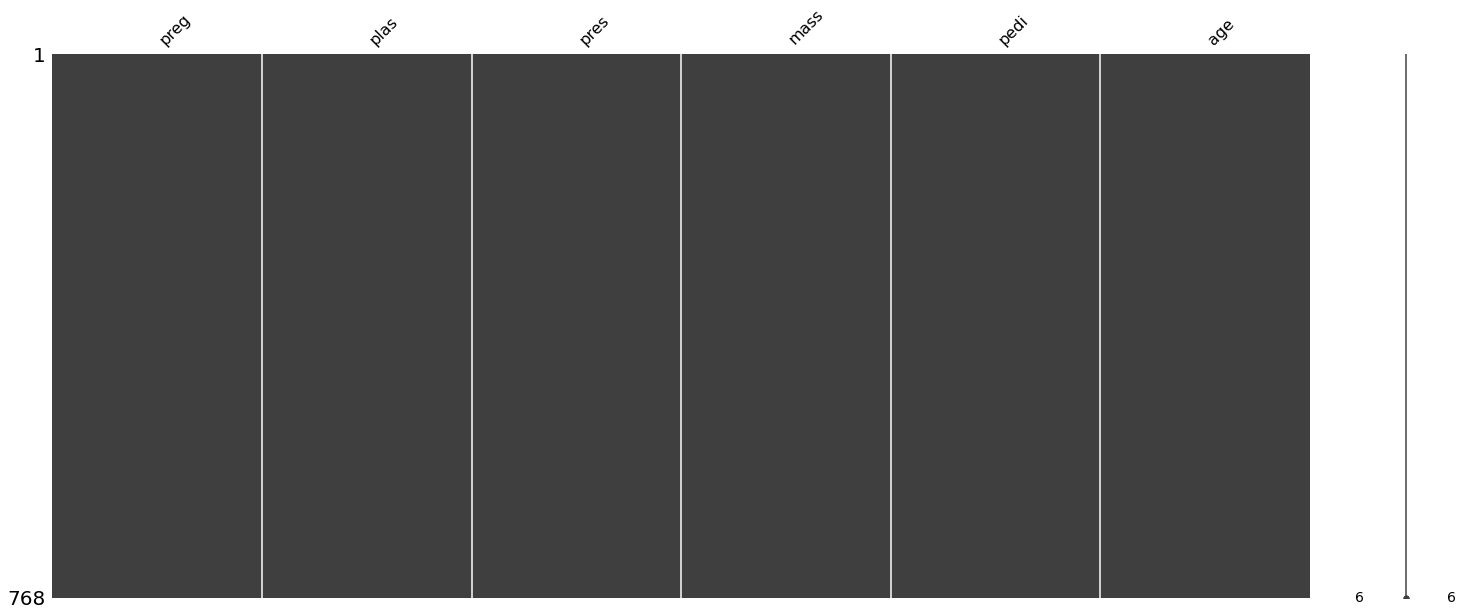

In [7]:
# substituindo os NaN de 'preg' por 0
atributos['preg'].fillna(0, inplace=True)

# substituindo os NaN de 'plas', 'pres' e 'mass' pela mediana da coluna
atributos['plas'].fillna(atributos['plas'].median(), inplace=True)
atributos['pres'].fillna(atributos['pres'].median(), inplace=True)
atributos['mass'].fillna(atributos['mass'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [8]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['class'] = dataset['class']

# exibindo as primeiras linhas
datasetSemMissings.head()

,preg,plas,pres,mass,pedi,age,class
0,6.0,148.0,72.0,33.6,0.627,50,1
1,1.0,85.0,66.0,26.6,0.351,31,0
2,8.0,183.0,64.0,23.3,0.672,32,1
3,1.0,89.0,66.0,28.1,0.167,21,0
4,0.0,137.0,40.0,43.1,2.288,33,1


In [9]:
# verificando nulls no dataset tratado
datasetSemMissings.isnull().sum()

preg     0
plas     0
pres     0
mass     0
pedi     0
age      0
class    0
dtype: int64

### Normalização

Você já deve ter aplicado este método no exercício da aula anterior. Vamos revisar!

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [10]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Pegando apenas os dados do dataset e guardando em um array
array = dataset.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:8]
Y = array[:,8]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


### Padronização

Você já deve ter aplicado este método no exercício da aula anterior. Vamos revisar!

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [11]:
# Padronizando os dados (média 0 e desvio padrão 1)

# Pegando apenas os dados do dataset e guardando em um array
array = dataset.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Padronizando os dados
scaler = StandardScaler()
standardX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Padronizados: 

 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


### Binarização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

A Binarização transforma os dados em valores binários (0 ou 1). Podemos definir um valor de corte em nossos dados (threshold) e definimos que todos os valores acima do threshold serão marcados como sendo 1 e todos valores iguais ou abaixo do threshold serão marcados como sendo 0. Isso é útil quando temos valores de probabilidades e queremos transformar os dados em algo com mais significado.

In [12]:
# Binarização

# Import da função
from sklearn.preprocessing import Binarizer

# Pegando apenas os dados do dataset e guardando em um array
array = dataset.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando a binarização

# acima de 0.5 converte para 1, abaixo para 0 (útil para conversão de saídas de probabilidades para classes)
binarizer = Binarizer(threshold = 0.5)
binaryX = binarizer.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Binarizados: \n\n", binaryX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Binarizados: 

 [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


## Prática 2: Transformações Categóricas com dataset Breast Cancer

In [13]:
# imports
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

### Carga do Dataset

In [14]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"

# Lê o arquivo utilizando as colunas informadas
dataset = read_csv(url, header=None)

# exibindo as primeiras linhas
print(dataset.head())

# exibindo as dimensões do dataset
print(dataset.shape)

# exibindo os tipos das colunas
print(dataset.dtypes)

         0          1        2      3      4    5        6           7      8  \
0  '40-49'  'premeno'  '15-19'  '0-2'  'yes'  '3'  'right'   'left_up'   'no'   
1  '50-59'     'ge40'  '15-19'  '0-2'   'no'  '1'  'right'   'central'   'no'   
2  '50-59'     'ge40'  '35-39'  '0-2'   'no'  '2'   'left'  'left_low'   'no'   
3  '40-49'  'premeno'  '35-39'  '0-2'  'yes'  '3'  'right'  'left_low'  'yes'   
4  '40-49'  'premeno'  '30-34'  '3-5'  'yes'  '2'   'left'  'right_up'   'no'   

                        9  
0     'recurrence-events'  
1  'no-recurrence-events'  
2     'recurrence-events'  
3  'no-recurrence-events'  
4     'recurrence-events'  
(286, 10)
0    object
1    object
2    object
3    object
4    object
5    object
6    object
7    object
8    object
9    object
dtype: object


### Tratamento de Missings

In [15]:
# verificando nulls no dataset
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
9    0
dtype: int64

In [16]:
# exibindo as dimensões do dataset
print(dataset.shape)

# eliminando linhas que tenham ALGUM valor missing
dataset.dropna(how='any', inplace=True)

# exibindo as dimensões do dataset
print(dataset.shape)

(286, 10)
(277, 10)


In [17]:
# Pegando apenas os dados do dataset e guardando em um array
array = dataset.values

### Codificação Ordinal

In [18]:
# separando o array em componentes de input e output
X = array[:,0:9]
y = array[:,9]

# ordinal encoding para os atributos X
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

# label encoding para o atributo y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# exibindo os dados transformados
print(X[:5, :]) # 5 primeiras linhas, todas as colunas
print(y[:5]) # 5 primeiras linhas

[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]
[1 0 1 0 1]


### One-hot encoding

In [19]:
# separando o array em componentes de input e output
X = array[:,0:9]
y = array[:,9]

# one hot encode para os atributos X
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

# exibindo os dados transformados
print(X[:5, :]) # 5 primeiras linhas, todas as colunas

[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]]


### Dummy encoding

In [20]:
# separando o array em componentes de input e output
X = array[:,0:9]
y = array[:,9]

# one hot encode para os atributos X
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
X = onehot_encoder.fit_transform(X)

# label encoding para o atributo y - Idêntico ao exemplo anterior

# exibindo os dados transformados
print(X[:5, :]) # 5 primeiras linhas, todas as colunas

[[0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 1. 0.]]
